In [1]:
from pandas import *
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =read_csv("C:\\Users\\deepa\\Downloads\\archive (16)\\twitter_training.csv")

In [3]:
df

,id,delete,target,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
df['text']=df['text'].str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74681 non-null  int64 
 1   delete  74681 non-null  object
 2   target  74681 non-null  object
 3   text    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
df['target'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [7]:
(df['target'] == 'Irrelevant').sum()

12990

In [8]:
df['target'].replace('Positive', 1, inplace=True)
df['target'].replace('Neutral', 0, inplace=True)
df['target'].replace('Irrelevant', 2, inplace=True)
df['target'].replace('Negative', -1, inplace=True)

In [9]:
df['target'].unique()

array([ 1,  0, -1,  2], dtype=int64)

In [10]:
def remove_stopwords_and_tokenize(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]  
    return filtered_tokens

In [11]:
df['text'] = df['text'].astype(str)

In [12]:
import string 
def remove_punctuation(text):
    return ''.join(char for char in text if char not in string.punctuation)
df['text'] = df['text'].apply(remove_punctuation)

In [13]:
df

,id,delete,target,text
0,2401,Borderlands,1,i am coming to the borders and i will kill you...
1,2401,Borderlands,1,im getting on borderlands and i will kill you all
2,2401,Borderlands,1,im coming on borderlands and i will murder you...
3,2401,Borderlands,1,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,1,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,1,just realized that the windows partition of my...
74677,9200,Nvidia,1,just realized that my mac window partition is ...
74678,9200,Nvidia,1,just realized the windows partition of my mac ...
74679,9200,Nvidia,1,just realized between the windows partition of...


In [14]:
import re
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

df['text'] = df['text'].apply(remove_html_tags)

In [15]:
df['text_modified'] = df['text'].apply(remove_stopwords_and_tokenize)

In [16]:
df

,id,delete,target,text,text_modified
0,2401,Borderlands,1,i am coming to the borders and i will kill you...,"[coming, borders, kill]"
1,2401,Borderlands,1,im getting on borderlands and i will kill you all,"[im, getting, borderlands, kill]"
2,2401,Borderlands,1,im coming on borderlands and i will murder you...,"[im, coming, borderlands, murder]"
3,2401,Borderlands,1,im getting on borderlands 2 and i will murder ...,"[im, getting, borderlands, 2, murder]"
4,2401,Borderlands,1,im getting into borderlands and i can murder y...,"[im, getting, borderlands, murder]"
...,...,...,...,...,...
74676,9200,Nvidia,1,just realized that the windows partition of my...,"[realized, windows, partition, mac, like, 6, y..."
74677,9200,Nvidia,1,just realized that my mac window partition is ...,"[realized, mac, window, partition, 6, years, b..."
74678,9200,Nvidia,1,just realized the windows partition of my mac ...,"[realized, windows, partition, mac, 6, years, ..."
74679,9200,Nvidia,1,just realized between the windows partition of...,"[realized, windows, partition, mac, like, 6, y..."


In [17]:
model=gensim.models.Word2Vec(window=10,min_count=2,workers=3)

In [18]:
model.build_vocab(df['text_modified'],progress_per=1000)

In [19]:
model.train(df['text_modified'],total_examples=model.corpus_count,epochs=100)

(79795944, 83611300)

In [20]:
model.wv.most_similar('sad')

[('2k', 0.3599933683872223),
 ('sorry', 0.34837523102760315),
 ('crazy', 0.3467702567577362),
 ('like', 0.3457961678504944),
 ('lucky', 0.3451143801212311),
 ('stupid', 0.3430755138397217),
 ('borderlandssf', 0.3399367332458496),
 ('xtra', 0.3388718068599701),
 ('guessing', 0.3328566253185272),
 ('superjam', 0.3312402069568634)]

In [21]:
df['text_modified'] = df['text_modified'].apply(lambda x: ' '.join(x))

In [22]:
xtra,xtes,ytra,ytes=train_test_split(df['text_modified'],df['target'],test_size=0.2)


In [23]:
vec=CountVectorizer()

In [24]:
xtra=vec.fit_transform(xtra)

In [25]:
xtes=vec.transform(xtes)

In [26]:
xtes[1]

<1x37929 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [27]:
nb_classifier = MultinomialNB()
nb_classifier.fit(xtra, ytra)

MultinomialNB()

In [28]:
nb_classifier.score(xtes,ytes)

0.7439914306755038

In [29]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [30]:
log.fit(xtra,ytra)

C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
log.score(xtes,ytes)

0.809064738568655

In [32]:
xtra[1]

<1x37929 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [33]:
print(log.predict(xtes[213]))

[2]


In [34]:
log.predict(xtra[2])

array([1], dtype=int64)

In [35]:
ypred=[]
for i in xtes:
    ypred.append(log.predict(i)[0]) 

In [36]:
ytes

57430    0
60343    0
36754   -1
57523    1
55444    1
        ..
6771     0
16919    2
24377    1
57018    1
1237     2
Name: target, Length: 14937, dtype: int64

In [37]:
ytes_modify=[]
for i in ytes:
    ytes_modify.append(i)
    

In [38]:
ytes_modify

[0,
 0,
 -1,
 1,
 1,
 1,
 -1,
 2,
 2,
 1,
 2,
 1,
 -1,
 1,
 0,
 0,
 1,
 1,
 -1,
 0,
 1,
 0,
 -1,
 1,
 0,
 2,
 0,
 0,
 0,
 2,
 -1,
 0,
 2,
 0,
 0,
 1,
 1,
 -1,
 0,
 0,
 1,
 2,
 2,
 0,
 2,
 -1,
 2,
 -1,
 -1,
 0,
 1,
 -1,
 1,
 2,
 -1,
 1,
 0,
 -1,
 -1,
 1,
 -1,
 0,
 0,
 1,
 -1,
 2,
 0,
 -1,
 2,
 2,
 -1,
 1,
 0,
 2,
 -1,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 -1,
 2,
 1,
 1,
 -1,
 2,
 2,
 0,
 -1,
 1,
 0,
 1,
 1,
 -1,
 1,
 2,
 1,
 -1,
 1,
 0,
 1,
 2,
 0,
 1,
 2,
 -1,
 -1,
 0,
 1,
 0,
 0,
 1,
 -1,
 1,
 -1,
 2,
 -1,
 0,
 -1,
 0,
 0,
 1,
 2,
 2,
 0,
 2,
 0,
 1,
 -1,
 1,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 0,
 -1,
 -1,
 2,
 0,
 -1,
 0,
 -1,
 1,
 -1,
 1,
 2,
 1,
 -1,
 0,
 0,
 -1,
 -1,
 -1,
 1,
 2,
 2,
 1,
 2,
 -1,
 0,
 1,
 -1,
 -1,
 0,
 1,
 -1,
 -1,
 0,
 2,
 2,
 0,
 1,
 -1,
 -1,
 -1,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 -1,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 -1,
 1,
 1,
 0,
 0,
 -1,
 0,
 1,
 2,
 1,
 2,
 2,
 -1,
 1,
 1,
 1,
 -1,
 0,
 -1,
 1,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 1,
 1,
 -1,
 

In [39]:
print(classification_report(ytes_modify, ypred))

              precision    recall  f1-score   support

          -1       0.84      0.84      0.84      4476
           0       0.82      0.78      0.80      3752
           1       0.75      0.85      0.80      4128
           2       0.84      0.72      0.78      2581

    accuracy                           0.81     14937
   macro avg       0.81      0.80      0.81     14937
weighted avg       0.81      0.81      0.81     14937



In [40]:
c=confusion_matrix(ytes_modify, ypred)
c

array([[3778,  212,  394,   92],
       [ 284, 2929,  414,  125],
       [ 240,  247, 3509,  132],
       [ 185,  182,  345, 1869]], dtype=int64)

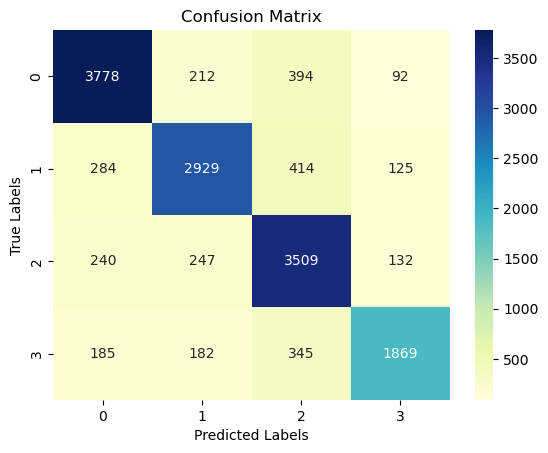

In [41]:
sns.heatmap(c, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def stringmodify(text):
    text=text.lower()
    clean = re.compile('<.*?>')
    text=re.sub(clean, '', text)
    text=''.join(char for char in text if char not in string.punctuation)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]  
    return filtered_tokens
    

In [ ]:
def predict(a):
    a=stringmodify(a)
    b=''
    for i in a:
        b=b+' '+i
    c=[b]
    c=vec.transform(c)
    d= log.predict(c)
    if d==-1:
        print('I can understand how it matters to you and how can it be resolved ')
    elif d==1:
        print('lets explore many with it as you are happy today')
    elif d==0:
        print ('lets make your neutral attitude to happy attitude')
    elif d==2 :
        print('it doesnt make sense at all sir')
    return d

In [ ]:
predict(' i am so much happy today')

In [ ]:
predict(' I am not so happy and not so sad')

In [ ]:
predict('i am very sad ')

In [ ]:
predict('u look amazing ')

In [ ]:
predict('i am angry now ')